In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["OMP_NUM_THREADS"] = "4"

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
columns = [f"feature_{i}" for i in range(54)] + ["Cover_Type"]
df = pd.read_csv(url, header=None, names=columns)

In [10]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Random Forest Accuracy: 0.9551646687262807
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.93      0.90      0.92      3489
           7       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



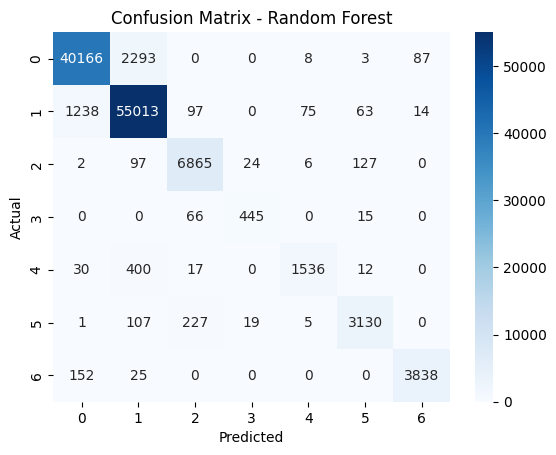

In [12]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb.fit(X_train, y_train - 1)
y_pred_xgb = xgb.predict(X_test) + 1

XGBoost Accuracy: 0.8711823274786366
              precision    recall  f1-score   support

           1       0.86      0.84      0.85     42557
           2       0.87      0.90      0.88     56500
           3       0.90      0.91      0.91      7121
           4       0.91      0.86      0.89       526
           5       0.89      0.59      0.71      1995
           6       0.85      0.82      0.83      3489
           7       0.94      0.92      0.93      4015

    accuracy                           0.87    116203
   macro avg       0.89      0.83      0.86    116203
weighted avg       0.87      0.87      0.87    116203



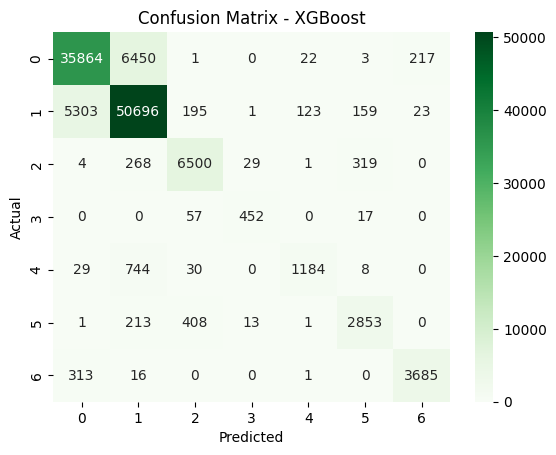

In [14]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

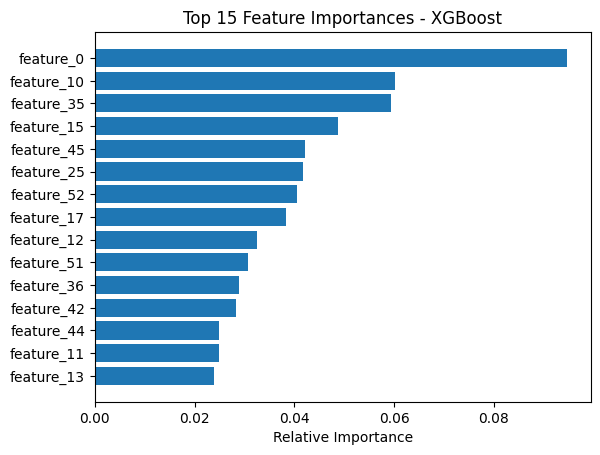

In [15]:
importances = xgb.feature_importances_
indices = np.argsort(importances)[-15:]
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()

In [20]:
print("Final Accuracy Comparison")
print("Random Forest:", accuracy_score(y_test, y_pred_rf))
print("XGBoost:", accuracy_score(y_test, y_pred_xgb))

Final Accuracy Comparison
Random Forest: 0.9551646687262807
XGBoost: 0.8711823274786366
